## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [180]:
! git clone https://github.com/ds4e/knn

fatal: destination path 'knn' already exists and is not an empty directory.


**Q0.**
1. What is the difference between regression and classification?


*   **Regression** is fitting a model to predict future numeric outcomes for new data. For example, conditional on price and footprint, what are sales likely to be? (numeric outcome). K-Nearest Neighbor Prediction Algorithm can be used for regression. The Nearest Neighbor Regression Algorithm first computes the distance from  $\hat{x}$ to each observation $x_i$. Then, it finds the $k$ "nearest neighbors" $x_1^*$, $x_2^*$, ..., $x_K^*$ to $\hat{x}$ in the data, with outcomes $y_{1}^*$, $y_2^*$, ..., $y_K^*$. Lastly, it computes the average nearest neighhor outcome as the prediction for $\hat{x}$:
$$
  \hat{y} = \dfrac{y_1^* + y_2^* + ... + y_K^* }{K} =  \dfrac{1}{K} \sum_{k=1}^K y_k^*
$$



*   **Classification** is fitting a model to predict future categorical outcomes for new data. For example, conditional on price and footprint, what class of vehicle is it likely to be? (categorical outcome). K-Nearest Neighbor Prediction Algorithm can also be used for classification. The algorithm will first compute the distance from $\hat{x}$ to each observation $x_i$. Then, it will find the $k$ "nearest neighbors" $x_1^*$, $x_2^*$, ..., $x_K^*$ to $\hat{x}$ in the data, with outcomes $g_{1}^*$, $g_2^*$, ..., $g_K^*$. Lastly, it will compute either the modal case among the neighbors, or a probability of each class occuring, proportional to the frequency in the neighbors



2. What is a confusion table? What does it help us understand about a model's performance?


*   A **confusion table** is a cross-tabulation of predicted and actual values. It is the fundamental quantity of interest we have for classification when it comes to fitting the model well and helping us understand a *model's performance. * We can use it to look for patterns in the successes and failures. This is an example of a confusion table for positive or negative for a medical condition:

|             | Predicted Negative | Predicted Positive |
| :---------------- | ------: | ----: |
| Actually Negative | True Negative   | False Positive |
| Actually Positive | False Negative| True Positive |


Confusion tables contain a lot of useful information about whether your model is doing well or poorly, and whether those errors are asymmetric or not!

3. What does the SSE quantify about a particular model?



*   The $SSE(k)$ is a really common measure of how far the predicted values are from the true values. Often, this is written more compactly in vector notation as $||y-\hat{y}||^2$: The squared norm of the distance between $y$ and $\hat{y}$. It is the sum of squared errors. Errors, or residuals, quantifies how far off the $i$-th prediction is from the actual value. We have a residual for each observation $i$, and so the SSE aggregates all those errors into metrics of model performance. This is important because residuals is the fundamental quantity of interest we have for regression when it comes to fitting the model well and helping us understand a model's peformance.


4. What are overfitting and underfitting?


*   **Overfitting** is essentially making your model unrealistically *precise*. For example, with k-NN, if you pick too small of hyperparameter k such as only 2 neighbors, your model will likely be overfitting. That is, it will have low bias, but high variance in the predictions. It is not really considering that there are a lot of unpredictable factors affecting the real-world phenomenon.
*   **Underfitting** is essentially making your model unrealistically *imprecise*. For example, with k-NN, if you pick too big of a hyperparemeter k such as 470 neighbors, your model will likely underfit. That is, it will have high bias, but low variance in the predictions. Your model is too simple to reliably explain the phenomenon you are interested in. Your model turned to mush, and instead of using local information, you're using "most of the data", and the predictions will tend towards the sample average.



5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?



*   **Splitting the data into training and testing sets** improves model performance because the fundamental idea behind machine learning and data science is that we want to use existing data to build a model that can predict what will happen tomorrow. However, to model that kind of uncertainty and validate whether the model is any good, I need data that my model has never seen, so splitting the sample into two or more chunks or folds, holding out some data from the training of the model to instead test its performance allows us to create a sample of data the model has never seen. As long as the data generating process in the future is like the data generating process in the past, performance on the hold-out data mimics future performance. Whenever we split the sample, we're substituting **uncertainty about future predictions** for **uncertainty about the hold-out data** in order to test the model. So, a simple and effective data-driven strategy that is done to do this is to randomly split the data into two sets, a training set and a test/validation set. For a reasonable range of values, we make a prediction using the training set for each observation in the test set, and then we compute the squared difference from the prediction to the true outcome for each point in the test set, then sum to get the sum of squared error (SSE). Then, we pick the $k$ that achieves the lowest SSE.
*   **Choosing $k$ by evaluating accuracy or SSE on the test set** improves model performance because you are using "unseen" data to find a good $k$ for future unseen data, but you have to be careful because doing this could lead to overfitting where you are really just finding the best k for the quirks of the test set, which might not actually mimic real life unseen data well.


6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.



*   **Reporting a class label as a prediction** is that it is straightforward. Your result is either "Yes" or "No." A weakness is you lose information about the uncertainty in the prediction.
*   **Reporting a probability distribution** is generally stronger in that it helps you understand the uncertainty in the prediction. For example, it is very unsettling for someone to receive the class label prediction of "You have cancer" when the reality is that it is like 51% chance you have cancer, 49% you do not have cancer. Either way, you should definitely get tested, but that is very different then a report of a class label that "you have cancer" where it is 99% "You have cancer" and 1% "you do not have cancer." A weakness is that it may not be as straightforward as just reporting the class label.






**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

**Part 1**

Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.

In [181]:
import pandas as pd

airbnb = pd.read_csv("/content/knn/data/airbnb_hw.csv")
airbnb = airbnb.loc[:, ['Review Scores Rating', 'Price', 'Beds']]
airbnb.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


**Part 2**
Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.


In [182]:
missing_reviews = airbnb[airbnb['Review Scores Rating'].isnull()]
missing_reviews.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
13,NaN,68,1.0


**Part 3**

Use df = df.dropna(axis = 0, how = 'any') to eliminate any observations with missing values/NA's from the dataframe.


In [183]:
airbnb = airbnb.dropna(axis = 0, how = 'any')

**Part 4**

For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)


In [184]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22111 entries, 4 to 30409
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Review Scores Rating  22111 non-null  float64
 1   Price                 22111 non-null  object 
 2   Beds                  22111 non-null  float64
dtypes: float64(2), object(1)
memory usage: 691.0+ KB




*   I was getting an error because Price is stored as an object


In [185]:
airbnb['Price'].unique()

array(['549', '149', '250', '90', '270', '290', '170', '59', '49', '285',
       '75', '145', '100', '150', '125', '40', '89', '95', '99', '499',
       '120', '79', '110', '180', '143', '230', '350', '135', '85', '60',
       '70', '55', '44', '200', '175', '165', '115', '74', '84', '129',
       '50', '185', '80', '190', '140', '45', '65', '225', '600', '109',
       '1,990', '73', '240', '105', '155', '160', '42', '132', '117',
       '295', '280', '159', '107', '239', '220', '199', '399', '130',
       '375', '585', '275', '139', '260', '35', '133', '300', '289',
       '179', '68', '195', '29', '27', '39', '249', '192', '142', '169',
       '131', '138', '113', '122', '329', '101', '475', '238', '272',
       '69', '308', '126', '235', '315', '248', '128', '56', '207', '210',
       '385', '445', '136', '247', '72', '118', '77', '76', '92', '205',
       '299', '222', '245', '104', '153', '349', '114', '320', '292',
       '226', '420', '500', '325', '307', '78', '450', '265', '10

In [186]:
airbnb['Price'] = airbnb['Price'].str.replace(',', '', regex=False)
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')
airbnb['Price'].unique()

array([  549,   149,   250,    90,   270,   290,   170,    59,    49,
         285,    75,   145,   100,   150,   125,    40,    89,    95,
          99,   499,   120,    79,   110,   180,   143,   230,   350,
         135,    85,    60,    70,    55,    44,   200,   175,   165,
         115,    74,    84,   129,    50,   185,    80,   190,   140,
          45,    65,   225,   600,   109,  1990,    73,   240,   105,
         155,   160,    42,   132,   117,   295,   280,   159,   107,
         239,   220,   199,   399,   130,   375,   585,   275,   139,
         260,    35,   133,   300,   289,   179,    68,   195,    29,
          27,    39,   249,   192,   142,   169,   131,   138,   113,
         122,   329,   101,   475,   238,   272,    69,   308,   126,
         235,   315,   248,   128,    56,   207,   210,   385,   445,
         136,   247,    72,   118,    77,    76,    92,   205,   299,
         222,   245,   104,   153,   349,   114,   320,   292,   226,
         420,   500,

In [187]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)

X = airbnb.loc[:,['Price','Beds']]
y = airbnb['Review Scores Rating']  # Target variable

X = X.apply(maxmin)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

k_bar = 50 # Number of k's to try
SSE = [] # We'll store the SSE here
SSE_on_train = [] # For pedogogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[48]


**Part 5**

Predict the missing ratings.

In [188]:
missing_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8323 entries, 0 to 30477
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Review Scores Rating  0 non-null      float64
 1   Price                 8323 non-null   object 
 2   Beds                  8282 non-null   float64
dtypes: float64(2), object(1)
memory usage: 260.1+ KB




*   Price here is also stored as object, so I need to convert to numeric like before



In [189]:
missing_reviews['Price'].unique()

array(['145', '37', '28', '199', '68', '700', '175', '90', '99', '74',
       '120', '115', '72', '150', '70', '110', '60', '125', '98', '300',
       '1,000', '170', '75', '55', '140', '107', '250', '290', '190',
       '95', '225', '450', '215', '240', '180', '130', '200', '198',
       '105', '100', '135', '59', '89', '65', '63', '299', '1,200', '158',
       '650', '695', '77', '260', '86', '179', '50', '52', '529', '275',
       '800', '80', '149', '124', '155', '320', '165', '97', '160', '64',
       '220', '280', '156', '62', '325', '3,000', '249', '85', '69',
       '235', '400', '78', '109', '147', '545', '245', '195', '185',
       '350', '40', '1,800', '219', '82', '169', '499', '440', '550',
       '357', '270', '174', '495', '349', '188', '5,999', '1,500', '42',
       '129', '159', '49', '210', '600', '79', '500', '142', '750', '247',
       '397', '123', '103', '355', '38', '475', '305', '108', '239',
       '559', '45', '10', '118', '230', '119', '4,750', '360', '211',


In [190]:
missing_reviews['Price'] = missing_reviews['Price'].str.replace(',', '', regex=False)
missing_reviews['Price'] = pd.to_numeric(missing_reviews['Price'], errors='coerce')

In [191]:
sum(missing_reviews['Price'].isna())

0

In [192]:
sum(missing_reviews['Beds'].isna())

41

In [193]:
missing_reviews = missing_reviews.dropna(subset=['Beds'])



*   Needed to drop nan Beds too



In [195]:
# Separate the features from the missing_reviews DataFrame
X_missing = missing_reviews[['Price', 'Beds']]

# Normalize the missing cases using the same maxmin function
X_missing = X_missing.apply(maxmin)

# Train the k-NN model using the optimal k
optimal_model = KNeighborsRegressor(n_neighbors=48) # k_star above was 48
optimal_model.fit(X_train, y_train)

# Predict the ratings for the missing reviews
predicted_missing_ratings = optimal_model.predict(X_missing)

# Add the predictions to the missing_reviews DataFrame
missing_reviews['Predicted Review Scores Rating'] = predicted_missing_ratings

# Now, you can inspect the missing_reviews DataFrame with the predicted ratings
missing_reviews



,Review Scores Rating,Price,Beds,Predicted Review Scores Rating
0,NaN,145,1.0,89.833333
1,NaN,37,1.0,91.604167
2,NaN,28,1.0,88.187500
3,NaN,199,3.0,89.958333
13,NaN,68,1.0,91.895833
...,...,...,...,...
30473,NaN,300,5.0,90.479167
30474,NaN,125,2.0,92.687500
30475,NaN,80,1.0,93.604167
30476,NaN,35,1.0,89.666667


**Part 6**

Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

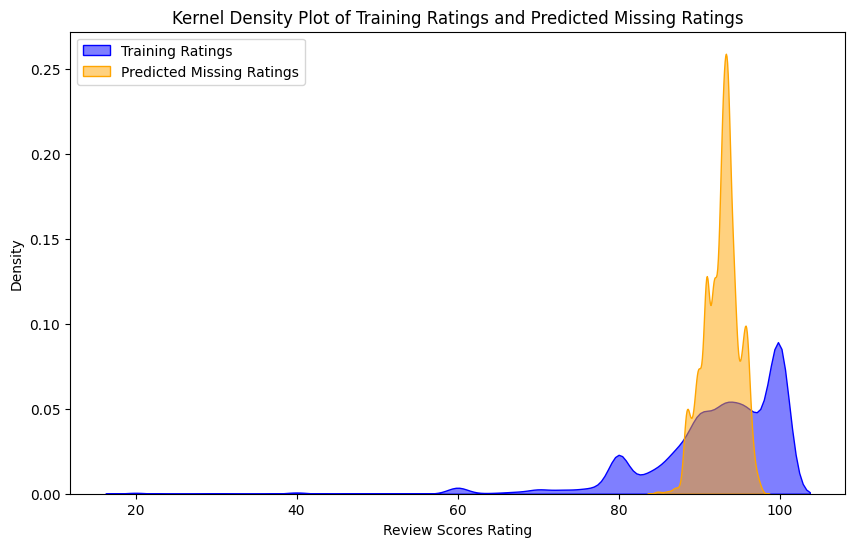

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_train, label='Training Ratings', color='blue', fill=True, alpha=0.5)
sns.kdeplot(predicted_missing_ratings, label='Predicted Missing Ratings', color='orange', fill=True, alpha=0.5)
plt.title('Kernel Density Plot of Training Ratings and Predicted Missing Ratings')
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')
plt.legend()
plt.show()




*   Yes. They look similar because it is using the training ratings to predict the ratings of them missing ratings based on the price and the bed variables. It found the closest samples to the missing entries, so the predictions are influenced by the training ratings.




